In [1]:
# all necessary libraries
!pip install numpy
!pip install sklearn
!pip install pandas
!pip install matplotlib

In [2]:
# imprting all the libraries
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string


In [3]:
X=[]  #X contains tuples of (docName,text)
Y=[]  #Y contains newspaperNames of corresponging values of X
for newspaper in os.listdir("C:/Users/iluvp/Desktop/text-classification/newsgroups/"):
    for document in os.listdir("C:/Users/iluvp/Desktop/text-classification/newsgroups/"+newspaper):
        with open("C:/Users/iluvp/Desktop/text-classification/newsgroups/"+newspaper+'/'+document,"r") as f:
            X.append((document,f.read()))
            Y.append(newspaper)

In [4]:
# splitting data into training and testing data
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y)

In [5]:
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [6]:
# building a dictionary called vocab which contains all the words in documents
vocab={}
for newspaper in range(len(X_train)):
    text= X_train[newspaper][1].lower()
    strippedwords=re.split(r'\W+',text)
    for word in strippedwords:
        if not(word.isalpha()) or word in stopwords or len(word)<=2:
            continue
        if word in vocab:
            vocab[word]+=1
        else:
            vocab[word]=1
        
vocab    

{'xref': 4505,
 'cantaloupe': 19493,
 'srv': 24203,
 'cmu': 39224,
 'edu': 122463,
 'talk': 9139,
 'politics': 5832,
 'drugs': 547,
 'misc': 8873,
 'newsgroups': 15308,
 'path': 15289,
 'crabapple': 4656,
 'ece': 4069,
 'europa': 4100,
 'eng': 5175,
 'gtefsd': 4082,
 'com': 37776,
 'gatech': 3317,
 'usenet': 6235,
 'ufl': 563,
 'darwin': 1790,
 'sura': 2782,
 'net': 19080,
 'zaphod': 6195,
 'mps': 6866,
 'ohio': 11817,
 'state': 14093,
 'moe': 246,
 'ksu': 663,
 'osuunx': 108,
 'ucc': 199,
 'okstate': 304,
 'constellation': 175,
 'kennejs': 30,
 'kennedy': 69,
 'james': 769,
 'scot': 29,
 'subject': 16170,
 'drug': 540,
 'use': 5303,
 'eighth': 40,
 'graders': 22,
 'message': 16533,
 'followup': 1090,
 'organization': 14914,
 'oklahoma': 105,
 'university': 7439,
 'computer': 2819,
 'science': 1958,
 'stillwater': 9,
 'date': 15576,
 'thu': 1466,
 'apr': 15417,
 'gmt': 13335,
 'keywords': 1172,
 'youths': 18,
 'lsd': 48,
 'inhalants': 7,
 'lines': 15670,
 'article': 9954,
 'follows': 2

In [7]:
# sorting the vocab dictionary on basis of frequency to determine the features
sorted_vocab=sorted(vocab.items(),key=operator.itemgetter(1),reverse=True)

In [8]:
import matplotlib.pyplot as plt

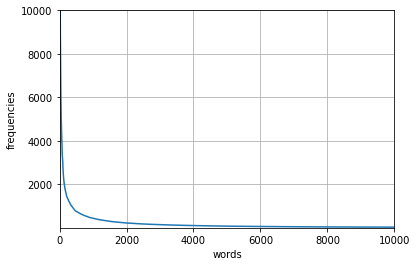

In [9]:
# plotting a graph to visualize and determine the best number of features
words=[]
frequencies=[]
for i in range(len(sorted_vocab)):
    words.append(i)
    frequencies.append(sorted_vocab[i][1])
plt.plot(words,frequencies)
plt.axis([0,10000,1,10000])
plt.xlabel("words")
plt.ylabel("frequencies")
plt.grid()
plt.show()

In [10]:
# features list
features=[]
for i in range(1000):
    features.append(sorted_vocab[i][0])
features

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'ohio',
 'writes',
 'article',
 'references',
 'comp',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'people',
 'like',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'usenet',
 'zaphod',
 'think',
 'alt',
 'politics',
 'windows',
 'use',
 'time',
 'rutgers',
 'harvard',
 'eng',
 'near',
 'new',
 'rec',
 'max',
 'crabapple',
 'noc',
 'good',
 'sei',
 'das',
 'xref',
 'soc',
 'cis',
 'europa',
 'god',
 'gtefsd',
 'ece',
 'world',
 'uunet',
 'religion',
 'way',
 'org',
 'christian',
 'gov',
 'say',
 'make',
 'right',
 'rochester',
 'distribution',
 'club',
 'mail',
 'space',
 'want',
 'sun',
 'gatech',
 'andrew',
 'udel',
 'magnesium',
 'reply',
 'said',
 'used',
 'ibm',
 'utexas',
 'nasa',
 'sys',
 'need',
 'work',
 'uiuc',
 'culture',
 'really',
 'computer',
 'sura',
 'graphi

In [11]:
# making X_train_dataset which shows the count of a word in the vocab dictionary
X_train_dataset=np.zeros([len(X_train),len(features)],int)
for i in range(len(X_train)):
    text=X_train[i][1].lower();
    words=re.split(r'\W+',text)
    for word in words:
        if word in features:
            X_train_dataset[i][features.index(word)]+=1
        
    

In [12]:
# making X_test_dataset which shows the count of a word in the vocab dictionary
X_test_dataset=np.zeros([len(X_test),len(features)],int)
for i in range(len(X_test)):
    text=X_test[i][1].lower();
    words=re.split(r'\W+',text)
    for word in words:
        if word in features:
            X_test_dataset[i][features.index(word)]+=1
        
    

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [14]:
clf=MultinomialNB() #The multinomial Naive Bayes classifier from sklearn
clf.fit(X_train_dataset,Y_train)
Y_prediction=clf.predict(X_test_dataset)
sklearn_score_test=clf.score(X_test_dataset,Y_test)
print("Score on training data:",clf.score(X_train_dataset,Y_train))
print("Score on testing data:",clf.score(X_test_dataset,Y_test))
print(confusion_matrix(Y_test,Y_prediction)) #confusion matrix to determine the performance of a classifier
print(classification_report(Y_test,Y_prediction)) #classification report to measure the quality of predictions  


Score on training data: 0.8698406347936254
Score on testing data: 0.8486
[[174   0   0   0   0   0   1   0   2   0   0   0   0   1   0   1   1   3
    1  51]
 [  0 184   9  21  22  13   7   2   1   0   1   2  12   1   1   0   0   0
    0   0]
 [  0   4 198  18   4  27   5   1   0   0   0   0   4   0   0   1   0   0
    0   0]
 [  0   0   3 177  53   3   2   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   0  11 218   0   8   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   8  16   5   9 182   7   0   0   1   0   1   6   0   2   0   0   0
    0   0]
 [  0   1   1   2   1   0 230   8   1   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5 229   8   0   2   0   7   0   2   0   0   0
    0   0]
 [  0   0   0   0   0   0   4   5 245   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   3   3 251  13   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   2   3  12 232   0   0   0   1   0   0   0
   

In [15]:
def fit(x_train_dataset,y_train):
    result={}
    total_word=0
    y_train=np.array(y_train)

    result["total_doc"]=len(y_train)
    classes=set(y_train)
    for class_ in classes:
        temp=0
        
        x_train_class=x_train_dataset[y_train==class_]
      
        temp2=x_train_class.shape[0]
    
        result[class_]={}
      
        for feature in features:
         
            l=(x_train_class[:,features.index(feature)]).sum()
            result[class_][feature]=l
            temp+=l
      
        result[class_]["word_in_class"]=temp
        result[class_]["length"]=temp2
        
        
    return result

In [16]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    
    for j in range (len(feature)-2):
        xj=x_test[j]
        
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [17]:
def predict_for_single(x_test,dic):
    best_class = None
    best_prob = None
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [18]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [19]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [20]:
dictionary=fit(X_train_dataset,Y_train)
Y_pred=predict_(X_test_dataset,dictionary)


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [22]:
our_score_test=score(Y_test,Y_pred)
print("Score on testing data:",score(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


Score on testing data: 0.8622
[[200   0   0   0   0   0   0   0   1   0   0   0   2   0   0   1   0   0
    1  30]
 [  0 183   8  21  25  13   2   0   0   0   0   0  21   3   0   0   0   0
    0   0]
 [  0   8 170  29   3  41   5   0   0   0   0   1   3   1   0   0   0   0
    1   0]
 [  0   2   0 202  32   2   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   0  11 221   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   8  11   7   6 196   4   0   0   0   0   0   4   0   0   0   0   0
    0   0]
 [  0   1   0   6   2   0 228   4   0   0   0   0   2   2   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   4 237   5   0   0   0   6   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   0   2   6 242   1   0   0   0   0   0   0   2   0
    1   0]
 [  0   0   0   0   0   0   0   0   0 257  15   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   6 244   0   0   0   0   0   0   0
    0   0]
 [  0   3   0   0   0   1   0   0  

In [23]:
print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.8622
Score of inbuilt sklearn's MultinomialNB on the same data : 0.8486
